### 목표
- 손글씨 데이터를 활용하여 다양한 딥러닝 모델을 설계해보자!
  - 0~9까지의 손글씨 데이터
  - 활성화함수 -> sigmoid, relu(vanishing gradient 방지)
  - 최적화함수 -> SGD(확률적경사하강법), Adam

- 모델링에 도움이 되는 callback 함수
(모델저장, 조기학습중단)

In [5]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 활성화함수 (relu), 최적화 함수(adam)


- 데이터로딩

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
# 학습용데이터 : 28*28 픽셀의 이미지데이터 6만장
# 평가용데이터 : 28*28 픽셀의 이미지데이터 1만장

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [6]:
# 정답데이터 확인 -> 클래스 개수 확인용!
np.unique(y_train)
# 0~9 까지 숫자를 가진다. -> 클래스 개수 10개 -> 다중분류

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

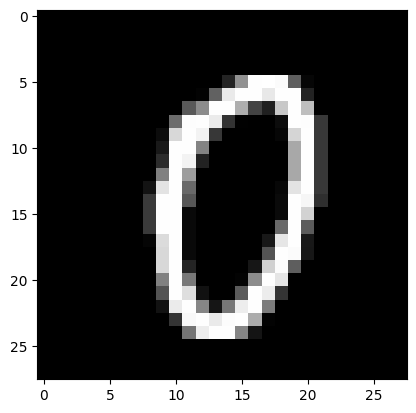

In [8]:
# 문제데이터, 사진데이터 확인
plt.imshow(X_train[1000], cmap = 'gray')
# 흑백사진이구나~~
# 얼마나 흰색인지 검은색인지의 정도를 숫자로 가지고 있다.(0~255)
# 0에 가까울수록 검정색, 1에 가까울수록 흰색

In [9]:
y_train[1001]

7

In [11]:
# 스스로 딥러닝모델 설계
# 딥러닝 설계 도구 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,InputLayer,Flatten
# InputLayer : 입력층 설정
# Flatten: 2차원의 사진데이터를 1차원으로 표현해주기 위한 클래스 for 선형모델 학습! 2차원은 선이 아니잖아~~

# 뼈대생성
model = Sequential()
# 입력층
model.add(InputLayer(shape=(28,28))) # 2차원
model.add(Flatten()) # 평평하게 만들어줌.

# 중간층 설계
# 32, 64, 128, 64, 32 -> 활성화함수 : relu
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 64, activation='relu'))
model.add(Dense(units = 128, activation='relu'))
model.add(Dense(units = 64, activation='relu'))
model.add(Dense(units = 32, activation='relu'))

# 출력층 설계 -> 다중분류 (units = 클래스의 개수)
model.add(Dense(10, activation="softmax"))

In [16]:
# 학습방법 및 평가방법 -> 최적화함수: adam
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
# 모델학습
model.fit(X_train, y_train, epochs=10, validation_split=0.2)
# validation_split -> 학습데이터 내에서 검증데이터를 활용하여 일반화정도를 확인

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6550 - loss: 1.6762 - val_accuracy: 0.9142 - val_loss: 0.3018
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9118 - loss: 0.3061 - val_accuracy: 0.9287 - val_loss: 0.2417
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9311 - loss: 0.2397 - val_accuracy: 0.9273 - val_loss: 0.2555
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9394 - loss: 0.2118 - val_accuracy: 0.9411 - val_loss: 0.2039
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9463 - loss: 0.1859 - val_accuracy: 0.9466 - val_loss: 0.1966
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9513 - loss: 0.1680 - val_accuracy: 0.9540 - val_loss: 0.1698
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9593 - loss: 0.1453 - val_accuracy: 0.9527 - val_loss: 0.1809
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9620 - loss: 0.1312 

In [19]:
model.history.history

{'accuracy': [0.8006874918937683,
  0.9163125157356262,
  0.9318333268165588,
  0.9399583339691162,
  0.9467916488647461,
  0.9518541693687439,
  0.9568125009536743,
  0.9608749747276306,
  0.9631041884422302,
  0.9645624756813049],
 'loss': [0.7407946586608887,
  0.29252392053604126,
  0.23516713082790375,
  0.210943803191185,
  0.18524229526519775,
  0.16434064507484436,
  0.15135617554187775,
  0.13744574785232544,
  0.12895813584327698,
  0.120111845433712],
 'val_accuracy': [0.9141666889190674,
  0.9286666512489319,
  0.9272500276565552,
  0.9410833120346069,
  0.9465833306312561,
  0.9539999961853027,
  0.9526666402816772,
  0.9559166431427002,
  0.9558333158493042,
  0.9601666927337646],
 'val_loss': [0.3017762005329132,
  0.2416609525680542,
  0.25545892119407654,
  0.20387162268161774,
  0.19658882915973663,
  0.16975340247154236,
  0.18090306222438812,
  0.15623216331005096,
  0.1594785451889038,
  0.15132403373718262]}

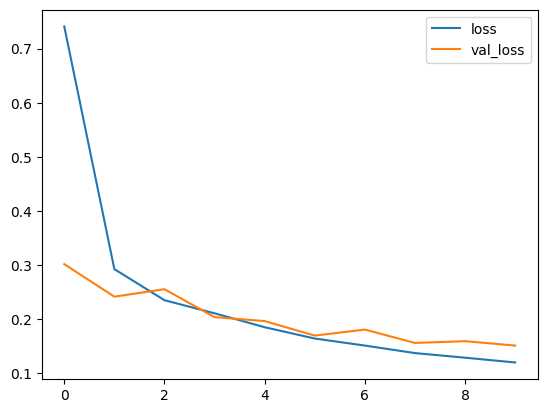

In [20]:
# 일반화 확인을 위한 곡선
# 두 곡선 모두 오차가 하향하고 있으니 일반화
# 만약 오차가 하향하다가 다시 오른다면 과대적합이지~
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()

In [21]:
# 평가
model.evaluate(X_test, y_test)
# 94% 정확도를 가진다!

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9499 - loss: 0.1973


[0.17299456894397736, 0.9550999999046326]

### callback 함수
- 모델저장
  - 딥러닝 모델 학습시 모델을 저장하는 기능
  - 지정된 epochs를 학습했을 시 과대적합이 되는 경우가 있다<br>  -> 중간의 일반화된 모델을 저장할 수 있는 기능<br>
  
- 조기학습중단
  - epochs를 크게 설정한 경우 일정 횟수 이상으로 모델의 성능이 개선되지 않는 경우가 있음 -> 시간 낭비 -> 모델의 성능이 개선되지 않는 경우에는 조기학습중단

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# ModelCheckpoint : 모델저장
# EarlyStopping : 조기학습중단

In [36]:
# 모델 저장 객체 생성
# epoch : 현재 에포크 번호 epochs : 전체 에포크 번호
# 02d : 두 자리 숫자로 에포크 번호 표시
# 0.3f : 소수점 3자리까지 실수형태로
model_path = '/content/drive/MyDrive/Colab Notebooks/24.09.02 DeepLearning/model/model_{epoch:02d}_{val_accuracy:0.3f}.hdf5.keras'
mc =ModelCheckpoint(filepath = model_path, # 모델의 저장 주소
                verbose = 1, # 로그 출력
                save_best_only = True, # 모델 성능이 최고점을 경신할때마다 저장
                monitor = 'val_accuracy') # 모델의 성능을 확인할 기준

In [37]:
# 조기학습중단 객체 생성
es = EarlyStopping(monitor = 'val_accuracy',
                   verbose = 1,
                   patience = 10)  # 모델성능 개선을 기다리는 최대 횟수

In [38]:
# 뼈대생성
model = Sequential()
# 입력층
model.add(InputLayer(shape=(28,28))) # 2차원
model.add(Flatten()) # 평평하게 만들어줌.

# 중간층 설계
# 32, 64, 128, 64, 32 -> 활성화함수 : relu
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 64, activation='relu'))
model.add(Dense(units = 128, activation='relu'))
model.add(Dense(units = 64, activation='relu'))
model.add(Dense(units = 32, activation='relu'))

# 출력층 설계 -> 다중분류 (units = 클래스의 개수)
model.add(Dense(10, activation="softmax"))

In [39]:
# 학습방법 및 평가방법 -> 최적화함수: adam
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
# 학습시 callback 함수를 사용한다.
model.fit(X_train, y_train, epochs = 100, validation_split = 0.2,
          callbacks = [mc,es])

Epoch 1/100
1480/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6762 - loss: 1.6630
Epoch 1: val_accuracy improved from -inf to 0.89933, saving model to /content/drive/MyDrive/Colab Notebooks/24.09.02 DeepLearning/model/model_01_0.899.hdf5.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6782 - loss: 1.6497 - val_accuracy: 0.8993 - val_loss: 0.3506
Epoch 2/100
1479/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9160 - loss: 0.2886
Epoch 2: val_accuracy improved from 0.89933 to 0.93558, saving model to /content/drive/MyDrive/Colab Notebooks/24.09.02 DeepLearning/model/model_02_0.936.hdf5.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9161 - loss: 0.2883 - val_accuracy: 0.9356 - val_loss: 0.2447
Epoch 3/100
1485/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9352 - loss: 0.2244
Epoch 3: val_accuracy improved from 0.93558 to 0.94125, saving model to /content/drive/MyDrive/Colab Notebooks/24.09.02 DeepLearning/model/model_03_0.941.hdf5.keras
150